# How do you measure justice

## Problem statement:
#### How do you measure justice? And how do you solve the problem of racism in policing? We look for factors that drive racial disparities in policing by analyzing census and police department deployment data. The ultimate goal is to inform police agencies where they can make improvements by identifying deployment areas where racial disparities exist and are not explainable by crime rates and poverty levels.

#### Our biggest challenge is automating the combination of police data, census-level data, and other socioeconomic factors. Shapefiles are unusual and messy -- which makes it difficult to, for instance, generate maps of police behavior with precinct boundary layers mixed with census layers. Police incident data are also very difficult to normalize and standardize across departments since there are no federal standards for data collection.



### Initial data exploration

Import required libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from pprint import pprint
import os

%matplotlib inline

### Department Files
#### Information from different police deprtments is organised into files, displayed below

In [16]:
filepath  = r'C:\Users\Laura\OneDrive\Kaggle\data-science-for-good'
dept = []
for f in os.listdir(filepath):
    if f.startswith('Dept'):
        dept.append(f)
pprint(depts)

['Dept_11-00091',
 'Dept_23-00089',
 'Dept_35-00103',
 'Dept_37-00027',
 'Dept_37-00049',
 'Dept_49-00009']


#### Each department folder contains a shapefile folder and a data folder. I have chosen to initially explore the Austin police department data, as it is the city I live in. 
Lets first look at the information provided by APD

In [26]:
APD_filepath = filepath + '\Dept_37-00027\\37-00027_ACS_data' 
APD_files = os.listdir(APD_filepath)
APD_files

['37-00027_ACS_education-attainment',
 '37-00027_ACS_education-attainment-over-25',
 '37-00027_ACS_owner-occupied-housing',
 '37-00027_ACS_poverty',
 '37-00027_ACS_race-sex-age']

APD has provided information regarding education level, over 25 eductation level, housing, poverty and race/sex/age


#### Exploration 1: APD information on poverty
Load data 

In [49]:
APD_pov = pd.read_csv(APD_filepath + '\\37-00027_ACS_poverty\ACS_16_5YR_S1701_with_ann.csv')
print(APD_pov.shape)
APD_pov.head()

(219, 369)


,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC01_EST_VC03,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,Id,Id2,Geography,Total; Estimate; Population for whom poverty s...,Total; Margin of Error; Population for whom po...,Below poverty level; Estimate; Population for ...,Below poverty level; Margin of Error; Populati...,Percent below poverty level; Estimate; Populat...,Percent below poverty level; Margin of Error; ...,Total; Estimate; AGE - Under 18 years,...,Below poverty level; Estimate; Worked less tha...,Below poverty level; Margin of Error; Worked l...,Percent below poverty level; Estimate; Worked ...,Percent below poverty level; Margin of Error; ...,Total; Estimate; Did not work,Total; Margin of Error; Did not work,Below poverty level; Estimate; Did not work,Below poverty level; Margin of Error; Did not ...,Percent below poverty level; Estimate; Did not...,Percent below poverty level; Margin of Error; ...
1,1400000US48453000101,48453000101,"Census Tract 1.01, Travis County, Texas",4270,276,270,104,6.3,2.4,821,...,127,66,30.6,16.4,420,99,117,65,27.9,14.2
2,1400000US48453000102,48453000102,"Census Tract 1.02, Travis County, Texas",2570,171,81,74,3.2,2.9,571,...,4,5,2.5,3.2,255,72,43,32,16.9,11.4
3,1400000US48453000203,48453000203,"Census Tract 2.03, Travis County, Texas",1258,174,423,142,33.6,9.1,49,...,169,73,49.9,13.2,207,96,160,90,77.3,15.7
4,1400000US48453000204,48453000204,"Census Tract 2.04, Travis County, Texas",3042,199,589,171,19.4,5.7,426,...,341,137,55.8,14.7,244,91,168,80,68.9,17.5


Each folder also contains a metadata file giving a brief description of the headings

In [33]:
APD_desc = pd.read_csv(APD_filepath + '\\37-00027_ACS_poverty\ACS_16_5YR_S1701_metadata.csv')
APD_desc.head()

,GEO.id,Id
0,GEO.id2,Id2
1,GEO.display-label,Geography
2,HC01_EST_VC01,Total; Estimate; Population for whom poverty s...
3,HC01_MOE_VC01,Total; Margin of Error; Population for whom po...
4,HC02_EST_VC01,Below poverty level; Estimate; Population for ...


Data appears to be grouped by Census Tract.
From census.gov: Census Tracts are small, relatively permanent statistical subdivisions of a county or equivalent entity that are updated by local participants prior to each decennial census as part of the Census Bureau's Participant Statistical Areas Program. 
Lets look at the total population from each census tract. 

In [101]:
APD_pov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Columns: 369 entries, GEO.id to HC03_MOE_VC79
dtypes: object(369)
memory usage: 631.4+ KB


In [102]:
tot_pop = APD_pov['HC01_EST_VC01'][1:].astype(float)

<function matplotlib.pyplot.show>

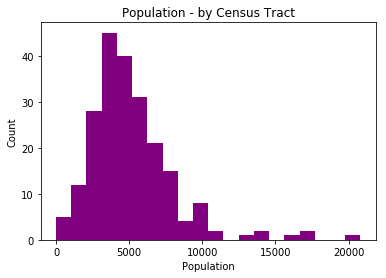

In [103]:
plt.hist(x = tot_pop, bins = 20, color = 'purple')
plt.ylabel('Count')
plt.xlabel("Population")
plt.title('Population - by Census Tract')
plt.show